# Question 2

## What are the cheapest and the most expensive neighbourhoods in Paris ?

### Introduction





This notebook contains the analysis performed to solve our second question about the **Cheapest vs most expensive neighbourhoods** in **Paris** in **June** 2022.
The data was collected from [**Inside Airbnb** website](http://insideairbnb.com/get-the-data/).
Check this section to get the [**listings**](http://data.insideairbnb.com/france/ile-de-france/paris/2022-06-06/data/listings.csv.gz) data, the [**calendar**](http://data.insideairbnb.com/france/ile-de-france/paris/2022-06-06/data/calendar.csv.gz) and also the [**reviews**](http://data.insideairbnb.com/france/ile-de-france/paris/2022-06-06/data/reviews.csv.gz) data provided in **Paris, Île-de-France, France** section.
This data will be used to answer the questions and complete this analysis about **Paris-Airbnb-data**.





In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

In [2]:
# Reading the data files
listings = pd.read_csv('data/paris-airbnb/listings.csv')
calendar = pd.read_csv('data/paris-airbnb/calendar.csv')

In [3]:
def preprocess(
    data: pd.DataFrame, columns_of_interest: List[str] = ["host_neighbourhood"]
):
    """This utility function is used to preprocess the dataframes
        and remove the missing values from the columns of interest.

    Arguments:
        data: The input dataframe.
        columns_of_interest: A list containing the used columns to preprocess.

    Returns:
        data: Preprocessed dataframe.
    """
    data = data.drop_duplicates()
    data = data.dropna(axis=1, how="all")
    data = data.dropna(subset=columns_of_interest)
    data.rename(
        columns={
            "id": "listing_id",
            "calendar_last_scraped": "date",
            "has_availability": "available",
        },
        inplace=True,
    )

    return data
    

    


We are going to preprocess the dataframes to get rid of the columns with fully missing values, rename columns and then merge it with the calendar dataframe.

In [4]:
preprocessed_listings = preprocess(listings,columns_of_interest=['host_neighbourhood','price','has_availability','minimum_nights','maximum_nights'])
preprocessed_listings.head()

,listing_id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6,26767859,https://www.airbnb.com/rooms/26767859,20220606014139,2022-06-07,Private room in a beautiful duplex next to Paris,Private room in a nice duplex (with two rooms)...,10 minutes walk from the Parc de la Villette (...,https://a0.muscache.com/pictures/1de4e19a-a452...,7786899,https://www.airbnb.com/users/show/7786899,...,5.00,4.00,4.00,NaN,f,3,1,2,0,0.03
11,595468760998844211,https://www.airbnb.com/rooms/595468760998844211,20220606014139,2022-06-06,★Duplex for 4p in St Cloud with a large terrace★,I will be delighted to welcome you to my charm...,ST CLOUD RACECOURSE <br />Situated on a platea...,https://a0.muscache.com/pictures/miso/Hosting-...,50502817,https://www.airbnb.com/users/show/50502817,...,NaN,NaN,NaN,NaN,t,134,133,1,0,NaN
16,553246603210104857,https://www.airbnb.com/rooms/553246603210104857,20220606014139,2022-06-06,Charmant appt spacieux et paisible - vue sur parc,Location Appartement Meublé à Saint Cloud (92)...,NaN,https://a0.muscache.com/pictures/0be3d219-7495...,434895890,https://www.airbnb.com/users/show/434895890,...,4.50,4.50,4.00,NaN,f,59,59,0,0,0.54
33,35412696,https://www.airbnb.com/rooms/35412696,20220606014139,2022-06-06,Appartement plein de charme au coeur des Puces,-In the heart of the Saint Ouen Paris flea mar...,NaN,https://a0.muscache.com/pictures/d3781ee0-8c91...,433304227,https://www.airbnb.com/users/show/433304227,...,4.89,4.67,4.56,NaN,f,17,17,0,0,0.25
40,36504421,https://www.airbnb.com/rooms/36504421,20220606014139,2022-06-06,GuestReady - Charming studio in Issy-les-Mouli...,"Located in a quiet residential area, this apar...","The parks are numerous in the city, conducive ...",https://a0.muscache.com/pictures/0af527b0-1226...,402191311,https://www.airbnb.com/users/show/402191311,...,4.77,4.75,4.29,9204000014635,t,204,203,0,0,1.36


In [5]:
preprocessed_calendar = preprocess(calendar,['price','adjusted_price','available','minimum_nights','maximum_nights'])
preprocessed_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,26660141,2022-06-07,f,$90.00,$90.00,5.0,8.0
1,26660141,2022-06-08,f,$90.00,$90.00,5.0,8.0
2,26660141,2022-06-09,f,$90.00,$90.00,5.0,8.0
3,26660141,2022-06-10,f,$90.00,$90.00,5.0,8.0
4,26660141,2022-06-11,f,$90.00,$90.00,5.0,8.0


In [6]:
preprocessed_listings.columns

Index(['listing_id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'available',
       'availability_30', 'availability_60',

In [7]:
preprocessed_calendar.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [8]:
# Merge booked listings and calendar dataframes
merged_df = pd.merge(preprocessed_calendar,preprocessed_listings,on=['listing_id','date','minimum_nights','price','available','maximum_nights'],how='inner')
merged_df

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,612233730970499583,2022-06-06,t,$100.00,$100.00,2.0,1125.0,https://www.airbnb.com/rooms/612233730970499583,20220606014139,2022-06-06,...,5.00,5.00,5.00,NaN,t,59,59,0,0,1.00
1,24126948,2022-06-06,t,$130.00,$130.00,4.0,1125.0,https://www.airbnb.com/rooms/24126948,20220606014139,2022-06-06,...,4.91,4.64,4.70,NaN,f,9,9,0,0,0.65
2,6049757,2022-06-06,t,$100.00,$100.00,15.0,1125.0,https://www.airbnb.com/rooms/6049757,20220606014139,2022-06-06,...,4.63,4.68,4.23,NaN,f,4,4,0,0,0.36
3,37442393,2022-06-06,t,$46.00,$46.00,30.0,1125.0,https://www.airbnb.com/rooms/37442393,20220606014139,2022-06-06,...,5.00,4.50,5.00,NaN,f,9,0,2,7,0.06
4,630384445461667292,2022-06-06,t,$136.00,$136.00,30.0,1125.0,https://www.airbnb.com/rooms/630384445461667292,20220606014139,2022-06-06,...,NaN,NaN,NaN,NaN,t,130,130,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,633157591553187158,2022-06-06,t,$226.00,$226.00,90.0,1125.0,https://www.airbnb.com/rooms/633157591553187158,20220606014139,2022-06-06,...,NaN,NaN,NaN,"Available with a mobility lease only (""bail mo...",t,199,199,0,0,NaN
994,635098096777821609,2022-06-07,t,$190.00,$190.00,3.0,1125.0,https://www.airbnb.com/rooms/635098096777821609,20220606014139,2022-06-07,...,NaN,NaN,NaN,7510106615260,f,2,2,0,0,NaN
995,639749165398809864,2022-06-06,t,$392.00,$392.00,90.0,1125.0,https://www.airbnb.com/rooms/639749165398809864,20220606014139,2022-06-06,...,NaN,NaN,NaN,"Available with a mobility lease only (""bail mo...",t,130,130,0,0,NaN
996,638963835790515156,2022-06-06,t,$700.00,$700.00,2.0,365.0,https://www.airbnb.com/rooms/638963835790515156,20220606014139,2022-06-06,...,NaN,NaN,NaN,7500812873456,f,10,10,0,0,NaN


In [9]:
merged_df.available.value_counts(dropna=False)

t    930
f     68
Name: available, dtype: int64

In [10]:
merged_df.price.value_counts(dropna=False)

$100.00      51
$80.00       44
$120.00      41
$70.00       33
$90.00       32
             ..
$1,167.00     1
$235.00       1
$147.00       1
$25.00        1
$700.00       1
Name: price, Length: 216, dtype: int64

In [11]:
merged_df.price.dtype

dtype('O')

In [12]:
merged_df.adjusted_price.dtype

dtype('O')


We can notice that the data types of **price** and **adjusted_price** columns are both objects. We need to work on them to make them usable.


In [13]:
def format_prices(data: pd.DataFrame, columns: List[str] = ["price", "adjusted_price"]):
    """This utility function is used to format the prices and make them numeric.

    Arguments:
        data: The input dataframe.
        columns: A list of price columns to format.

    Returns:
        data: The output dataframe with formatted price columns."""
    for col in columns:

        data[col] = data[col].str.replace("$", "", regex=True)
        data[col] = data[col].str.replace(",", "", regex=True)
        data[col] = pd.to_numeric(data[col])

    return data

In [14]:
def format_availability(data: pd.DataFrame, column: str = "available") -> pd.DataFrame:
    """This utility function is used to format the availability column
        and make it boolean.

    Arguments:
        data: The input dataframe.
        column: The availability column name.

    Returns:
        data: The output dataframe with formatted availability column."""
    data.loc[(data[column] == "t"), column] = True
    data.loc[(data[column] == "f"), column] = False

    return data

In [15]:
merged_df = format_prices(merged_df)
merged_df = format_availability(merged_df)

In [16]:
merged_df.available.value_counts(dropna=False)

True     930
False     68
Name: available, dtype: int64

### Plots

In [17]:
def plot_neighbourhoods(
    data: pd.DataFrame,
    address_column: str = "host_neighbourhood",
    price_column: str = "adjusted_price",
    number_of_samples: int = 10,
    most_expensive: bool = True,
    is_available: bool = True,
) -> None:
    """This utility function is used to plot the most expensive and cheapest neighbourhoods according to certain conditions.

    Arguments:
        data: The input dataframe.
        address_column: The column containing the host's neighbourhood address.
        price_column: The column indicating the final prices for the listing.
        number_of_samples: The number of samples to plot.
        most_expensive: A boolean indicating whether to plot the most expensive or the cheapest listings.
        is_available: A boolean indiating the availability of the listings.
    """
    availability = {True: "available", False: "booked"}
    if most_expensive:

        title = f"Top {number_of_samples} most expensive {availability[is_available]} listings in Paris"
    else:
        title = f"Top {number_of_samples} cheapest {availability[is_available]} listings in Paris"

    data = data.loc[data.available == is_available]
    neighbourhoods = (
        data.groupby(address_column)
        .mean()[price_column]
        .sort_values(ascending=not (most_expensive))
    )
    neighbourhoods_names = neighbourhoods[:number_of_samples].keys()
    prices = neighbourhoods[:number_of_samples].values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))
    palette_color = sns.color_palette("bright")
    fig.suptitle(title, fontweight="bold", fontsize=30, y=0.95)

    ax1.bar(neighbourhoods_names, prices, color=palette_color)
    ax1.set_ylabel("Price($)", fontsize=20)
    ax1.set_xlabel("Neighbourhoods", fontsize=20)
    ax1.tick_params(axis="y", labelsize=15)

    # Rotation of the bars names
    ax1.tick_params(axis="x", labelrotation=90, labelsize=15)

    # plotting data on chart
    ax2.pie(
        prices,
        labels=neighbourhoods_names,
        colors=palette_color,
        autopct="%.0f%%",
        textprops={"fontsize": 15},
    )
    ax2.legend(bbox_to_anchor=(0.5, 1.5), prop={"size": 15})
    # displaying chart
    plt.show()


These are the most **expensive** and the **cheapest** neighbourhoods in Paris both **booked** and **available** ones. 


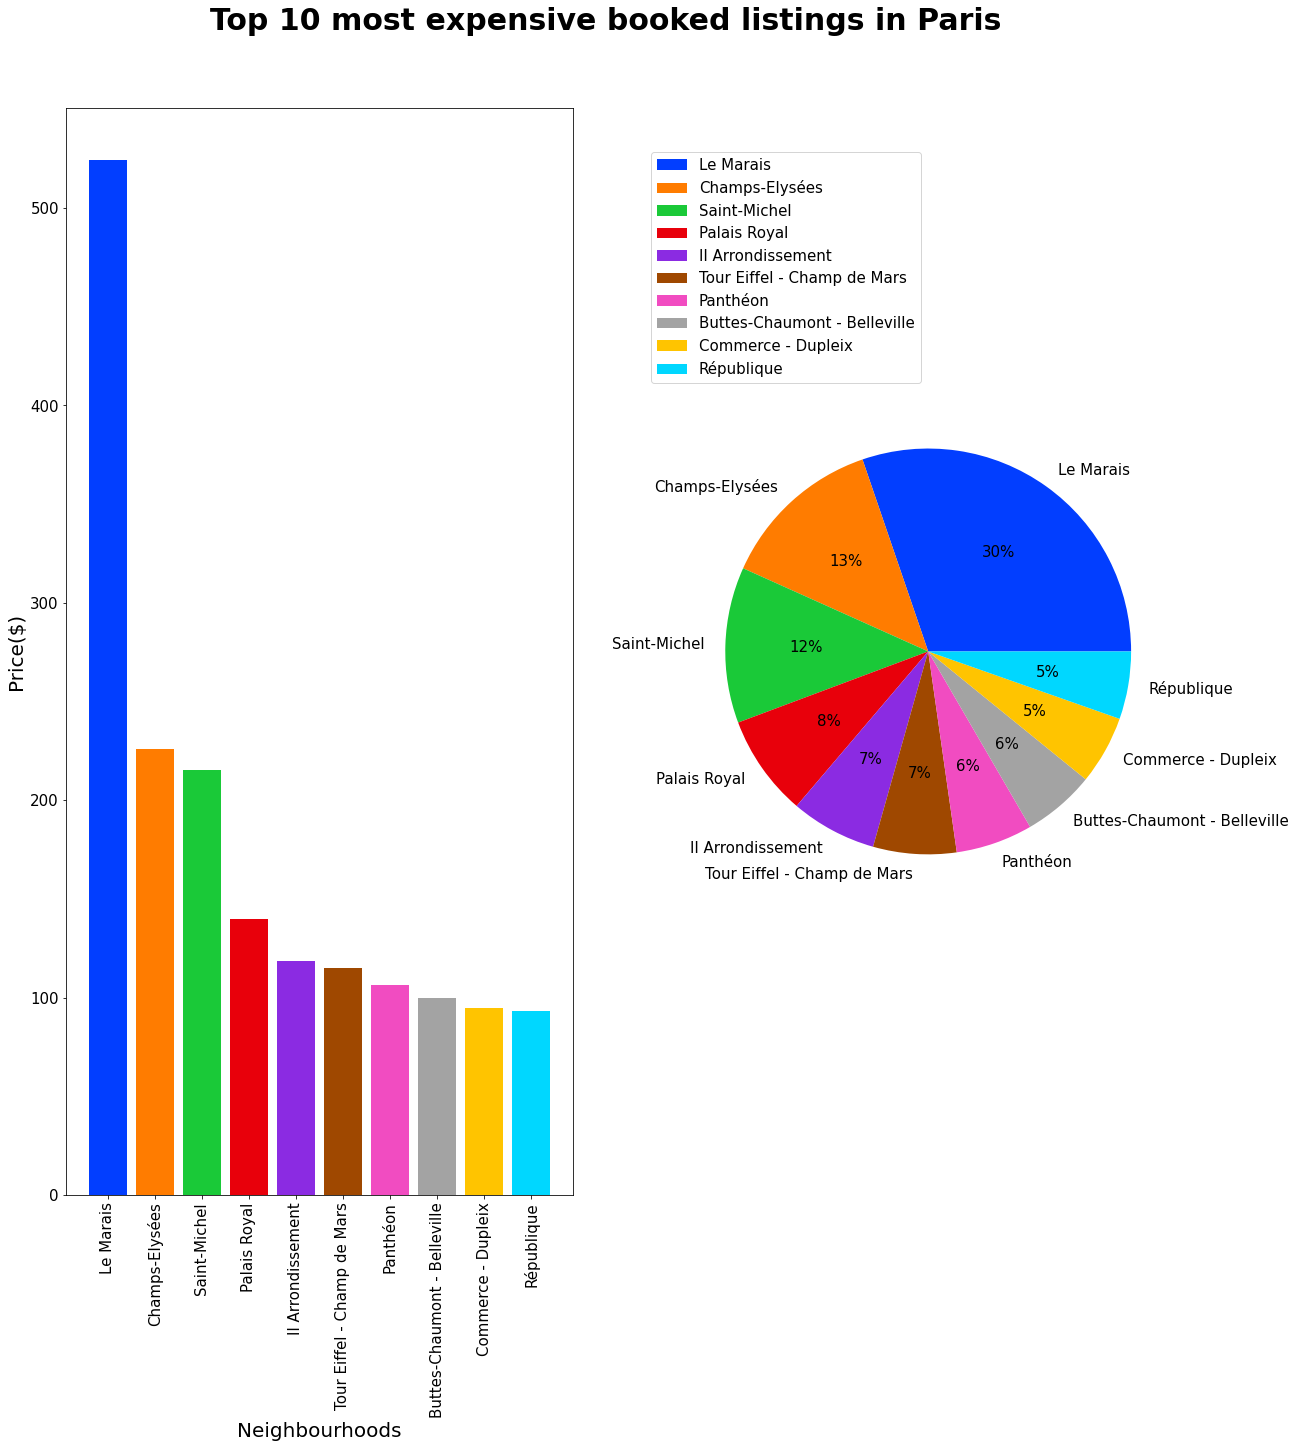

In [18]:
plot_neighbourhoods(merged_df,most_expensive=True,number_of_samples=10,is_available=False);

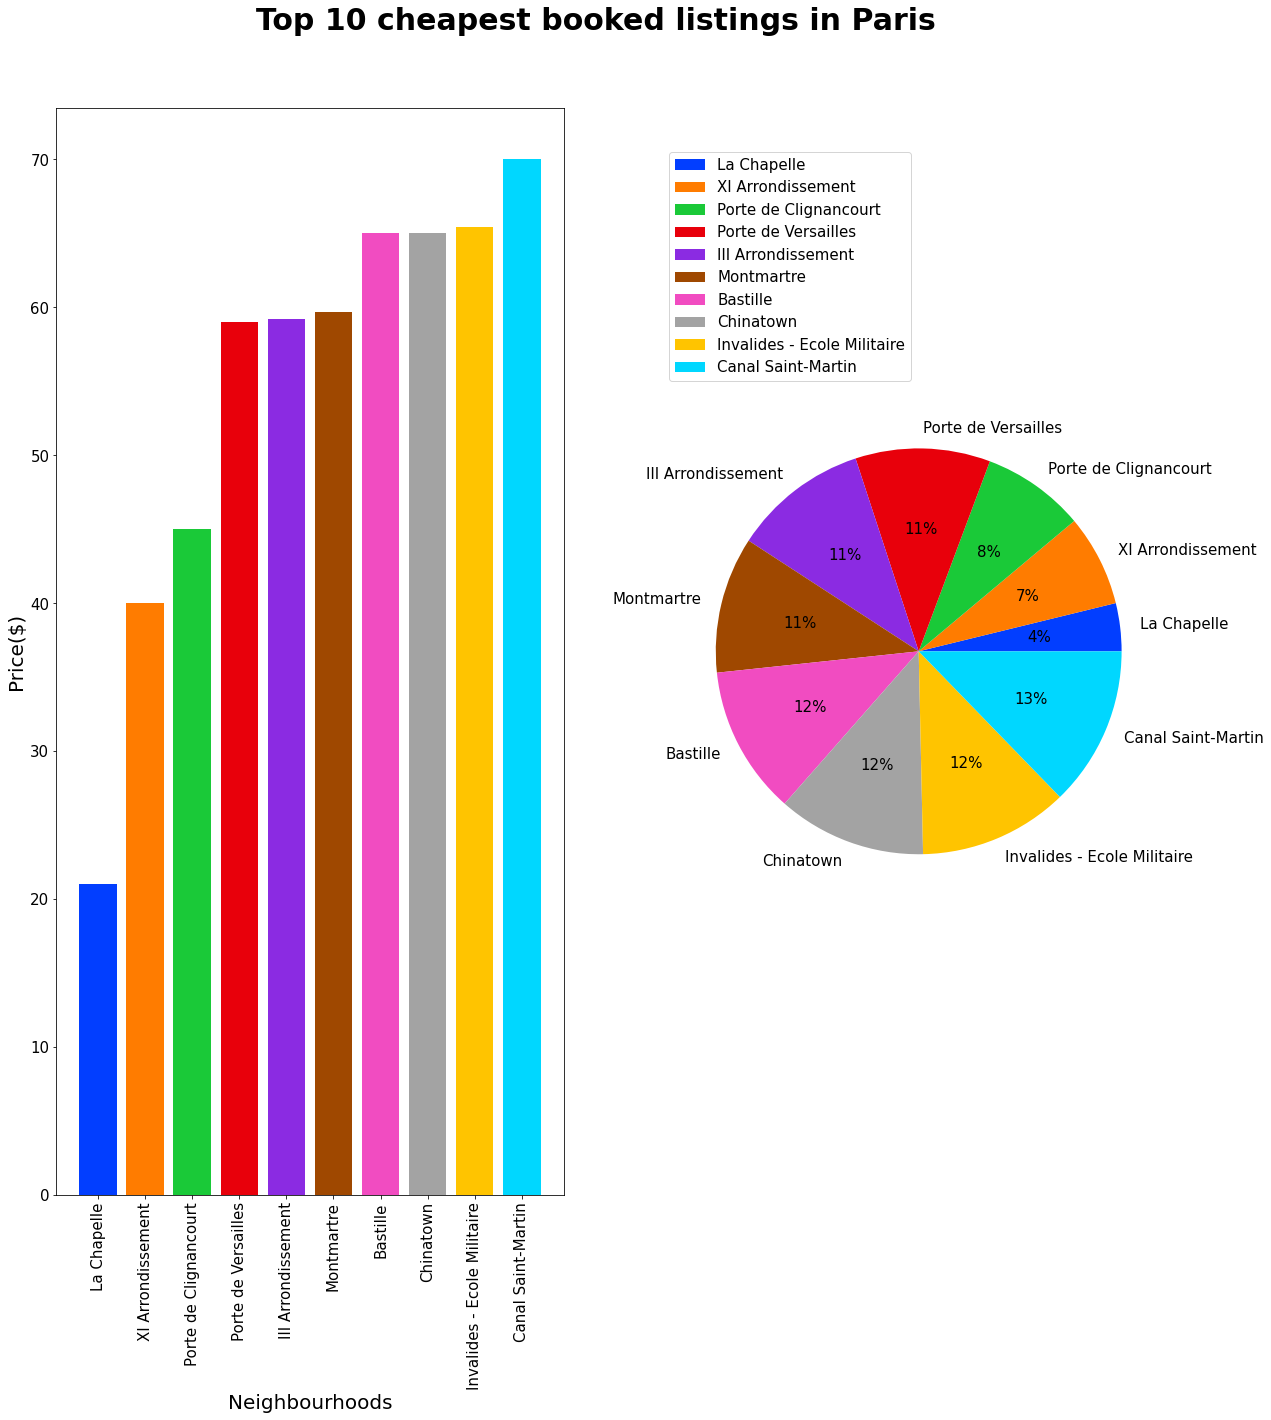

In [19]:
plot_neighbourhoods(merged_df,most_expensive=False,number_of_samples=10,is_available=False);

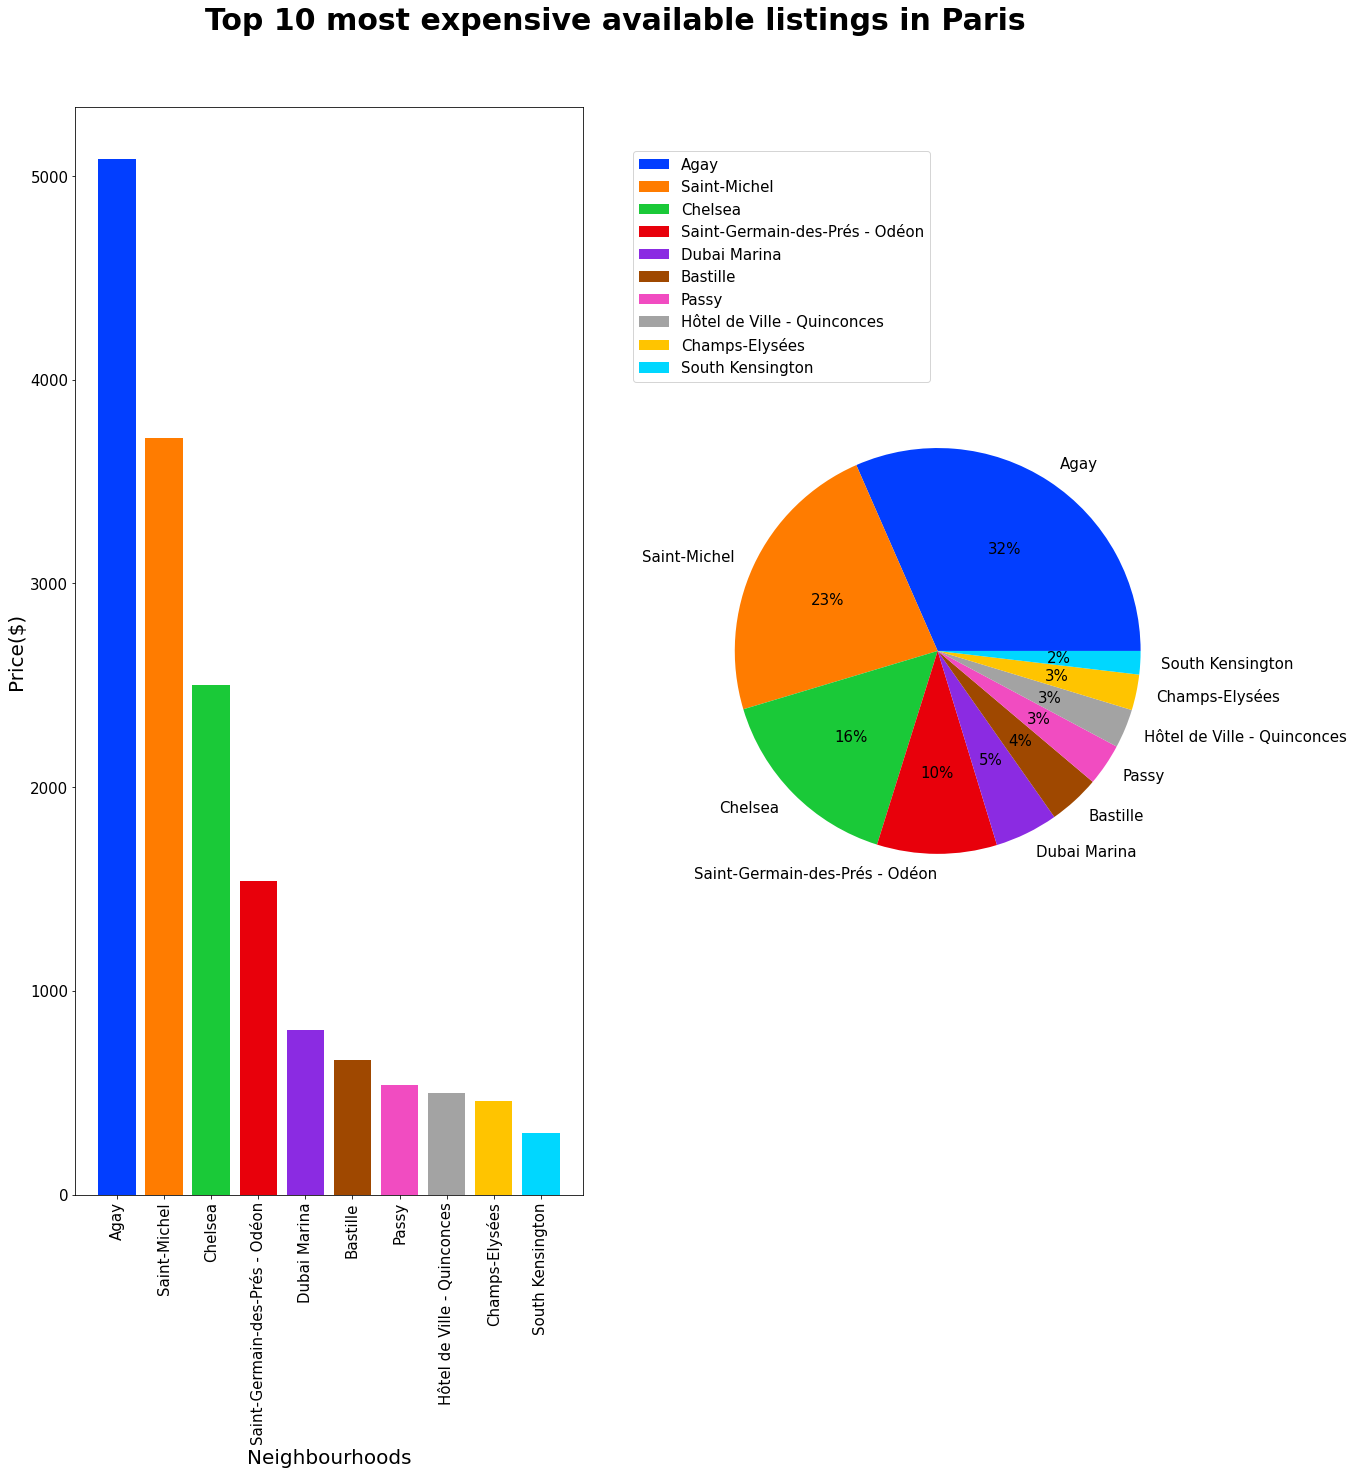

In [20]:
plot_neighbourhoods(merged_df,most_expensive=True,number_of_samples=10,is_available=True);

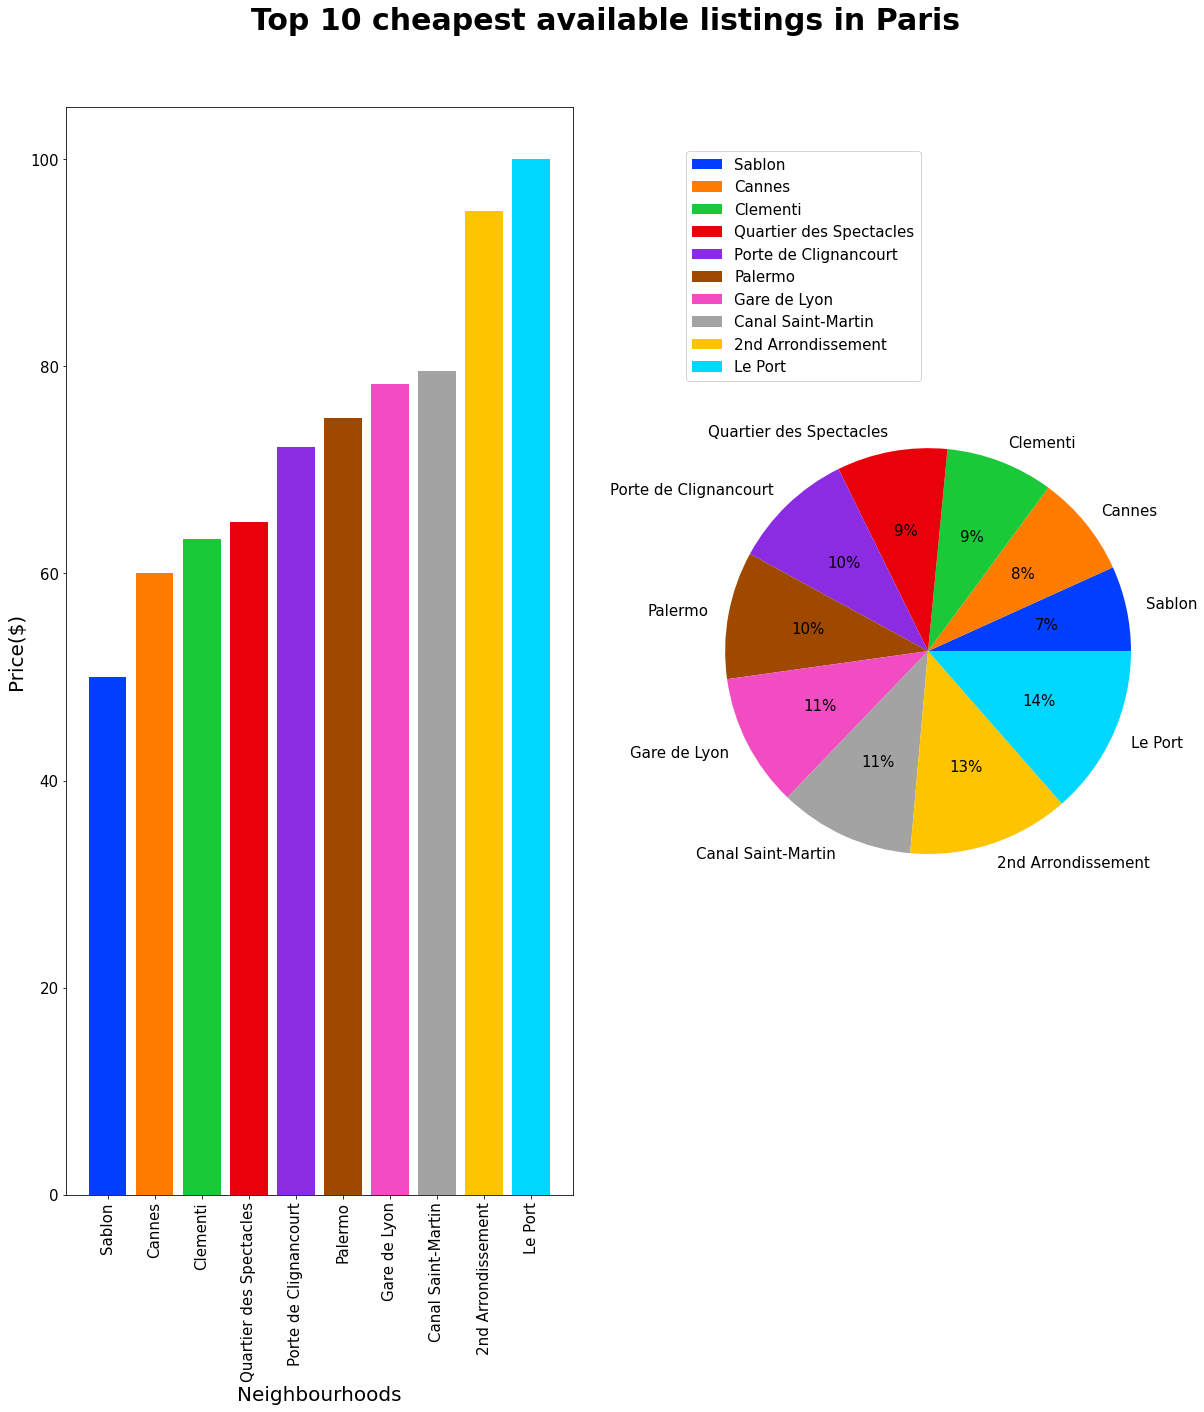

In [21]:
plot_neighbourhoods(merged_df,most_expensive=False,number_of_samples=10,is_available=True);

### Conclusion


In this part we tried to visualize the merged listings with the related calendar to get some insights about the most expensive and cheapest neighbourhoods in Paris.

